In [29]:
import torch
import pandas as pd
import torch.nn.functional as F
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from poker_utils.model import (analyze_embeddings, 
                               save_model_and_embeddings, evaluate_hand_hand_equity, 
                               prob_embeddings)

In [20]:
pca_emb = torch.load("model_weights/preflop_pca_embedding.pt", weights_only=False)
contrastive_emb = torch.load("model_weights/preflop_contrastiveencoder_embeddings.pt", weights_only=False)
equitydiff_emb = torch.load("model_weights/preflop_equitydiff_embeddings.pt", weights_only=False)

In [30]:
embeddings = (pca_emb + contrastive_emb + equitydiff_emb) / 3
embeddings = F.normalize(embeddings)

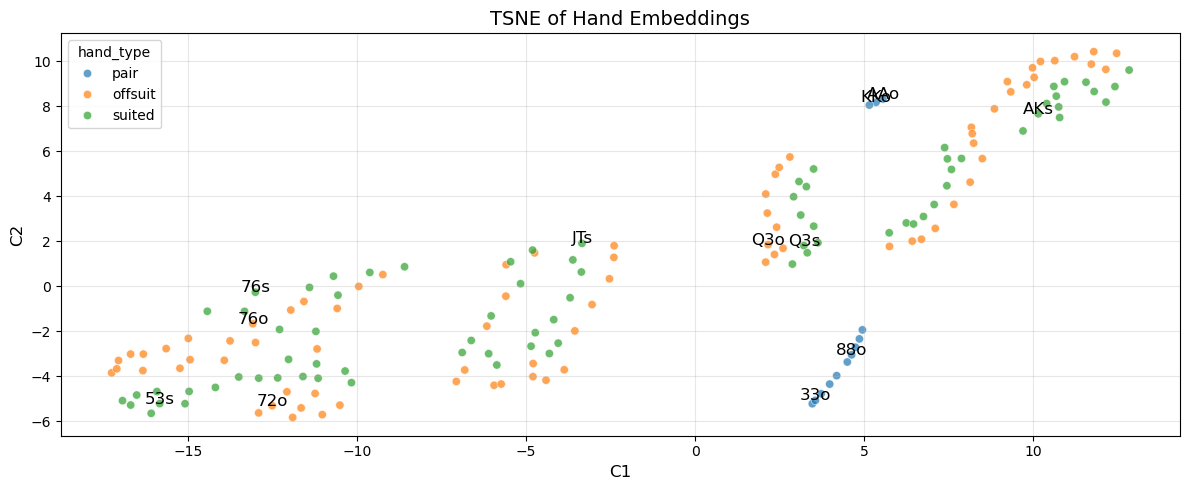

   hand         top_1         top_2         top_3       bottom_1  \
0   AAo  KKo (0.9550)  QQo (0.8864)  AQo (0.7411)  72s (-0.6549)   
1   KKo  QQo (0.9584)  AAo (0.9550)  JJo (0.7597)  85s (-0.7399)   
2   72o  82o (0.9803)  62o (0.9534)  73o (0.9326)  QQo (-0.6762)   
3   76s  75s (0.9154)  65s (0.9077)  86s (0.8814)  AAo (-0.5479)   
4   76o  85o (0.9379)  86o (0.9364)  75o (0.9360)  KKo (-0.6575)   
5   Q3s  Q4s (0.9632)  Q5s (0.9297)  Q3o (0.9082)  86o (-0.2666)   
6   Q3o  Q4o (0.9425)  Q5o (0.9187)  Q3s (0.9082)  87s (-0.2984)   
7   88o  77o (0.9601)  99o (0.9585)  TTo (0.8386)  43o (-0.5501)   
8   JTs  J9s (0.8600)  JTo (0.8572)  T9s (0.8298)  53o (-0.5829)   
9   33o  22o (0.9453)  44o (0.9370)  55o (0.7899)  T9o (-0.4156)   
10  AKs  AQs (0.9588)  AJs (0.9522)  ATs (0.9415)  J2o (-0.3882)   
11  53s  64s (0.9538)  42s (0.9535)  43s (0.9317)  KTo (-0.5495)   

         bottom_2       bottom_3  
0   92s (-0.6725)  82s (-0.7051)  
1   72s (-0.7495)  82s (-0.7821)  
2   TTo (-

In [31]:
similarity_df = analyze_embeddings(
    embeddings, 
    hands_of_interest=['AAo','KKo','72o','76s','76o','Q3s',"Q3o",'88o','JTs','33o',"AKs","53s"],
    hand_feature_to_color='hand_type',
    figsize=(12,5)
    )

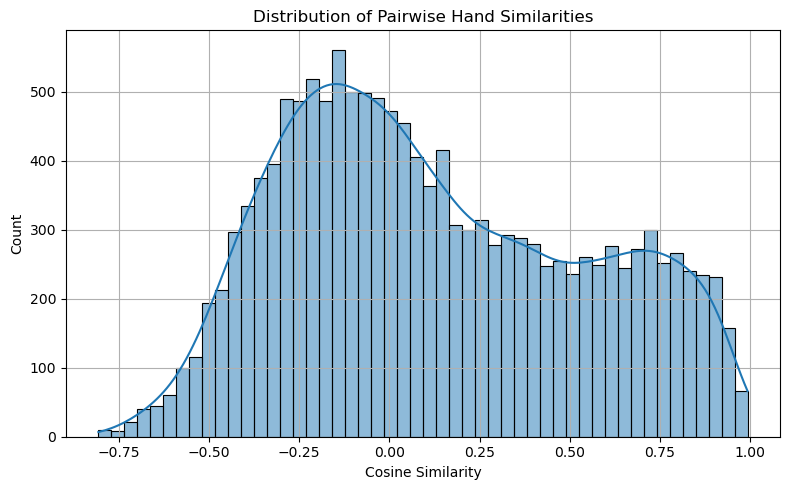

In [32]:
mask = np.triu(np.ones(similarity_df.shape), k=1).astype(bool)
pairwise_sims = similarity_df.where(mask)

all_similarities = pairwise_sims.stack().values

plt.figure(figsize=(8, 5))
sns.histplot(all_similarities, bins=50, kde=True)
plt.title("Distribution of Pairwise Hand Similarities")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
equity_matrix = pd.read_csv("data/processed/equity_matrix.csv")
prob_data = pd.read_csv('data/processed/prob_data.csv')

In [34]:
evaluate_hand_hand_equity(embeddings, equity_matrix.set_index('hand').to_numpy())

{'spear_corr': np.float64(0.7255500001127129), 'pval': np.float64(0.0)}

In [35]:
prob_res = prob_embeddings(embeddings, prob_data)

In [40]:
prob_res

,attribute,class,accuracy,precision,recall,f1_score,support_frac,rmse
0,suited,0,1.000000,1.000000,1.0,1.000000,0.538462,NaN
1,suited,1,1.000000,1.000000,1.0,1.000000,0.461538,NaN
2,connectedness,0,0.911243,1.000000,1.0,1.000000,0.076923,NaN
3,connectedness,1,0.911243,0.962963,1.0,0.981132,0.153846,NaN
4,connectedness,2,0.911243,1.000000,1.0,1.000000,0.142012,NaN
...,...,...,...,...,...,...,...,...
59,pos7_play8,NaN,NaN,NaN,NaN,NaN,NaN,0.153420
60,pos7_play9,NaN,NaN,NaN,NaN,NaN,NaN,0.159775
61,pos8_play10,NaN,NaN,NaN,NaN,NaN,NaN,0.161136
62,pos8_play9,NaN,NaN,NaN,NaN,NaN,NaN,0.167277


In [ ]:
# save_model_and_embeddings(
#     embeddings,
#     "preflop_embeddings"
# )